In [13]:
import numpy as np
import pandas as pd
import sklearn.model_selection as ml
from scipy.stats import norm
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


In [14]:
spam_dataset = pd.read_csv("../datasets/spam.csv")
spam_labels = [val for val in spam_dataset['label'].values]
spam_points = spam_dataset.drop(['label'], axis=1).values

spam_points_training, spam_points_test, spam_labels_training, spam_labels_test = ml.train_test_split(spam_points, spam_labels, train_size=0.8)


In [32]:

class GNB:
    def __init__(self, data, labels):
        self.labels_variants = set(labels)
        self.mean = np.array([np.mean(data[labels == label], axis=0) for label in self.labels_variants])
        self.variance = np.array([np.var(data[labels == label], axis=0) for label in self.labels_variants])
        
    def _label_prob(self, label_index, point):
        pdf = norm(self.mean[label_index], self.variance[label_index]).pdf(point)
        return np.sum(np.log(pdf[~np.isnan(pdf)] + 0.0000001))
        
    def _prob_point(self, point):
        probabilities = np.ones(len(self.labels_variants))
        exp_sum = 0
        for (index, label) in enumerate(self.labels_variants):
            label_prob = self._label_prob(index, point)
            probabilities[index] = label_prob
            exp_sum += np.exp(probabilities[index])
        return np.exp(probabilities) / exp_sum
        
    def prob(self, points):
        return np.array([self._prob_point(point) for point in points])
        
    def predict(self, points):
        return np.argmax(self.prob(points), axis=1)


In [49]:
def gnb(points_training, points_test, labels_training, labels_test):
    model = GNB(points_training, labels_training)
    print(f'Accuracy: {np.mean(model.predict(points_test) == labels_test)}')
    plt.plot(*roc_curve(labels_test, [el[0] for el in model.prob(points_test)])[0:1])
    plt.show()

Accuracy: 0.8675352877307275


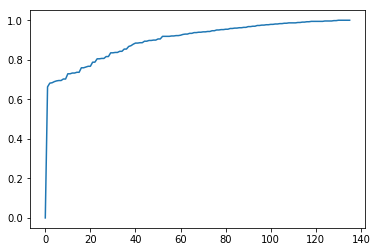

In [50]:
gnb(spam_points_training, spam_points_test, spam_labels_training, spam_labels_test)